# Deep Computer Vision Using Convolutional Neural Networks:

# A. Convolutional Layers:

* A convolution is a mathematical operation that slides one function over another and measures the integral of their pointwise multiplication. It has deep connections with the Fourier transform and the Laplace transform and is heavily used in signal processing. Convolutional layers actually use cross-correlations, which are very similar to convolution

* The most important building block of a CNN is the convolutional layer: 
    * Neurons in the first convolutional layer are not connected to every single pixel in the input image , but only to pixels in their receptive fields. <br>
    &emsp; 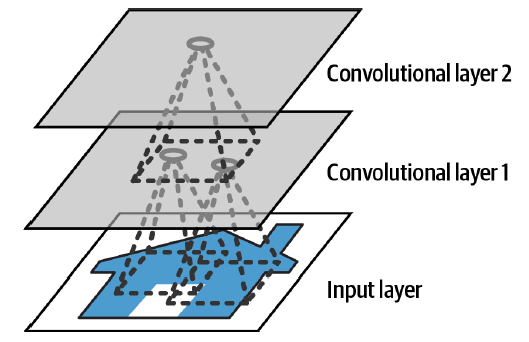 <br>
    * In turn, each neuron in the second convolutional layer is connected only to neurons located within a small rectangle in the first layer.
    * This architecture allows the network to concentrate on small low-level features in the first hidden layer, then assemble them into larger higher-level features in the next hidden layer, and so on.

* A neuron located in row $i$, column $j$ of a given layer is connected to the outputs of the neurons in the previous layer located in rows $i$ to $i + f_h – 1$, columns $j$ to $j + f_w – 1$, where $f_h$ and $f_w$ are the height and width of the receptive field. <br>
    * In order for a layer to have the same height and width as the previous layer, it is common to add zeros around the inputs, as shown in the diagram. This is called zero padding. <br>
    &emsp; 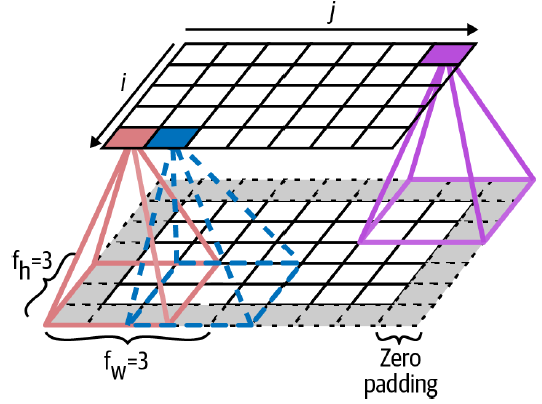 <br>

    * It is also possible to connect a large input layer to a much smaller layer by spacing out the receptive fields. This dramatically reduces the model’s computational complexity. The horizontal or vertical step size from one receptive field to the next is called the stride.
    <br>
    &emsp; 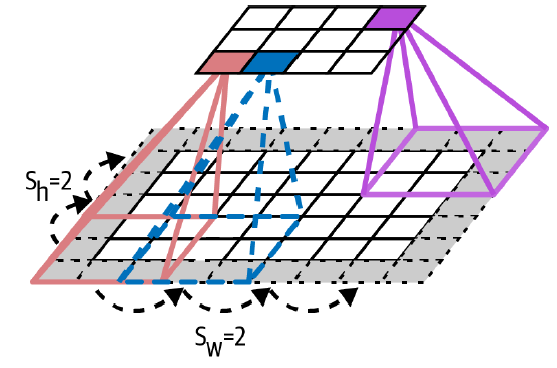 <br>

### A.1 Filters:
* A neuron's weights can be represented as a small image the size of the receptive field. 
* Filters (or convolutional kernels, kernels) are set of weights.
    * A layer full of neurons using the same filter outputs a **feature map**, w/c highlights the areas in an image that activate the filter the most.
    * During training, the convolutional layer will automatically learn the most useful filters for its task, and the layers above will learn to combine them into more complex patterns. <br>
    &emsp; 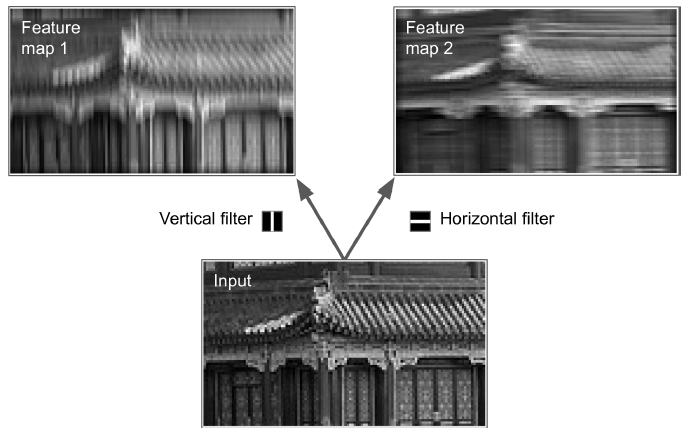 <br>

### A.2 Stacking Multiple Feature Maps:

* In reality, a convolutional layer has multiple filters (you decide how many) and outputs one feature map per filter.
    * Conv. layer has one neuron per pixel in each feature map, and all neurons w/in a given feature map share the same parameters (i.e., the same kernel and bias term).
    * Neurons in different feature maps use different parameters.
    * A neuron's receptive field extends across all the feature maps of the previous layer.
    * In short, a convolutional layer simultaneously applies multiple trainable filters to its inputs, making it capable of detecting multiple features anywhere in its inputs. <br>
    &emsp; 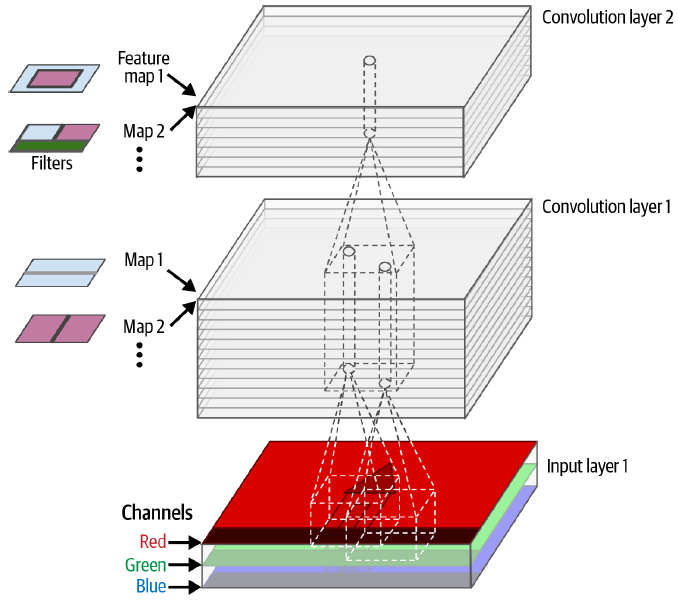 <br>

* The fact that all neurons in a feature map share the same parameters dramatically reduces the number of parameters in the model. 
    * Once the CNN has learned to recognize a pattern in one location, it can recognize it in any other location.
    * In contrast, once a fully connected neural network has learned to recognize a pattern in one location, it can only recognize it in that particular location.

* Input images are also composed of multiple sublayers: one per color channel. 


### A.3 Implementing Convolutional Layers w/ Keras : 

* `Convolution2D` layers, (`Conv2D`):
    * This layer relies on TensorFlow's `tf.nn.conv2d()` operation.
    * `padding="same"`:
        * The inputs are padded w/ enoughzeros on all sides to ensure that the output feature maps end up w/ the same size as the inputs.
    * When creating `Conv2D` layer, specify an activation function, kernel initializer. A convulotional layer performs a linear operation, so if you stacked multiple convolutional layers w/o any activation functions, they would all be equivalent to a single convolutional layer, and they wouldn't be able to learn anything really complex.

* Strides:
    * `strides=1`: <br>
    &emsp; 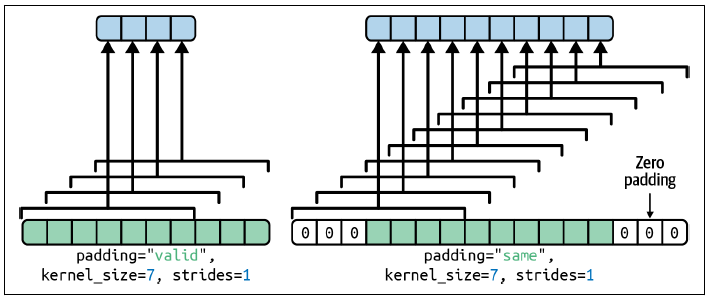 <br>
    &emsp; 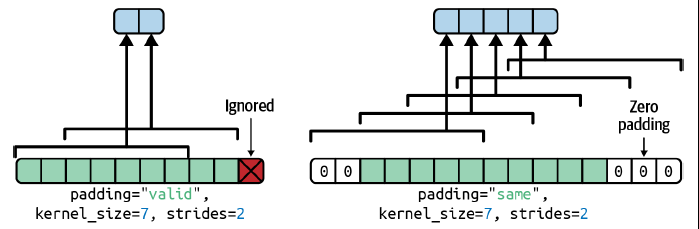 <br>

* How the output is computed w/ givens:
    * $s$ = stride (width or height)
    * $i$ = input size (width or height)
    * $f$ = kernel size (width or height)

    * `padding="valid"`:
        * Output Width, $o_w\ =\ \Large \frac{(i_h - f_h + s_h)}{s_h}$ rounded down.
            * Any remainder in the division corresponds to ignored columns on the right side of the input image.
        * Output Height, $o_h\ =\ \Large \frac{(i_v - f_v + s_v)}{s_v}$ rounded down. 
            * Any remainder in the division corresponds to ignored columns on the bottom of the input image.

    * `padding="same"`:
        * Output Width, $o_w\ =\ \Large \frac{i_h }{s_v}$ rounded up.
            * To make this possible, the appropriate number of zero columns are padded to the left and right of the input image (an equal number if possible, or just one more on the right side).
            * Number of padded zero columns = $(o_w-1) x s_h + f_h - i_h$.
        * Output Height, $o_h\ =\ \Large \frac{i_v}{s_v}$ rounded down. 
            * To make this possible, the appropriate number of zero columns are padded to the top and bottom of the input image (an equal number if possible, or just one more on the right side).
            * Number of padded zero columns = $(o_h-1) x s_v + f_v - i_v$.


* Weights
    * `Conv2D` layer holds all the layer's weights, including the kernels and biases.
    * The kernels are initialized randomly, while the biases are initialized to zero.
    * The `kernels` array is 4D w/ shape *[kernel_height, kernel_width, input_channels,output_channels]*.
    * The `biases` array is 1D, w/ shape *[output_channels]*.
        * The number of output channels is equal to the number of output feature maps, which is also equal to the number of filters.
    * Weights are accessible as TF variables via the `weights` attribute, or as np arrays via the `get_weights()` method.

In [23]:
from sklearn.datasets import load_sample_images
import tensorflow as tf

In [24]:
images = load_sample_images()["images"]
images = tf.keras.layers.CenterCrop(height=70, width=120)(images)
images = tf.keras.layers.Rescaling(scale=1 / 255)(images)

In [25]:
images.shape

TensorShape([2, 70, 120, 3])

In [26]:
conv_layer = tf.keras.layers.Conv2D(filters=32, kernel_size=7)
fmaps = conv_layer(images)

In [27]:
fmaps.shape

TensorShape([2, 64, 114, 32])

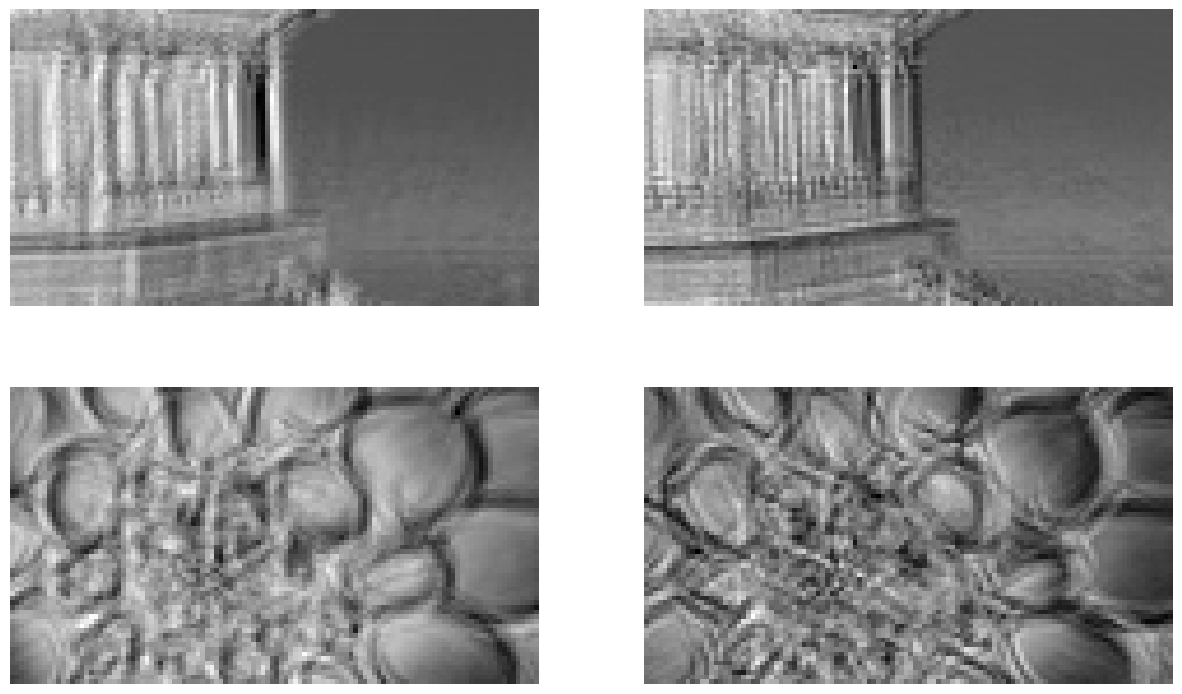

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 9))
for image_idx in (0, 1):
    for fmap_idx in (0, 1):
        plt.subplot(2, 2, image_idx * 2 + fmap_idx + 1)
        plt.imshow(fmaps[image_idx, :, :, fmap_idx], cmap="gray")
        plt.axis("off")

plt.show()

In [29]:
conv_layer = tf.keras.layers.Conv2D(filters=32, kernel_size=7,
                                    padding="same")
fmaps = conv_layer(images)

In [30]:
fmaps.shape

TensorShape([2, 70, 120, 32])

In [31]:
conv_layer = tf.keras.layers.Conv2D(filters=32, kernel_size=7, padding="same",
                                    strides=2)
fmaps = conv_layer(images)
fmaps.shape

TensorShape([2, 35, 60, 32])

In [32]:
# extra code – this utility function can be useful to compute the size of the
#              feature maps output by a convolutional layer. It also returns
#              the number of ignored rows or columns if padding="valid", or the
#              number of zero-padded rows or columns if padding="same"."""

import numpy as np

def conv_output_size(input_size, kernel_size, strides=1, padding="valid"):
    """
    This utility function can be useful to compute the size of the
    feature maps output by a convolutional layer. It also returns
    the number of ignored rows or columns if padding="valid", or the
    number of zero-padded rows or columns if padding="same
    
    """
    if padding=="valid":
        z = input_size - kernel_size + strides
        output_size = z // strides
        num_ignored = z % strides
        return output_size, num_ignored
    else:
        output_size = (input_size - 1) // strides + 1
        num_padded = (output_size - 1) * strides + kernel_size - input_size
        return output_size, num_padded

conv_output_size(np.array([70, 120]), kernel_size=7, strides=2, padding="same")

(array([35, 60]), array([5, 5]))

In [33]:
# Weights
kernels, biases = conv_layer.get_weights()
kernels.shape

(7, 7, 3, 32)

In [34]:
biases.shape

(32,)

In [35]:
# how to use the tf.nn.conv2d() operation
tf.random.set_seed(42)
filters = tf.random.normal([7, 7, 3, 2])
biases = tf.zeros([2])
fmaps = tf.nn.conv2d(images, filters, strides=1, padding="SAME") + biases

# B. Pooling Layers:

* Pooling layers' goal is to subsample (i.e., shrink) the input image in order to reduce the computational load, the memory usage, and the number of parameters (thereby limiting the risk of overfitting).
    * Each neuron in a pooling layer is connected to the outputs of a limited number of neurons in the previous layer, located w/in a small rectangular receptive field. Its size, stride and padding type must be defined.
    * A pooling neuron has no weights, all it does is aggregate the inputs using an aggregation function such as max or mean.
    * A pooling layer typically works on every input channel independently, so the output depth (i.e., number of channels) is the same as the input depth.
    * Example : Max Pooling layer, that use a 2x2 pooling kernel, w/ a stride of 2 and no padding. Only the max input value in each receptive field makes it to the next layer, while the other inputs are dropped. 
        <br>
        &emsp; 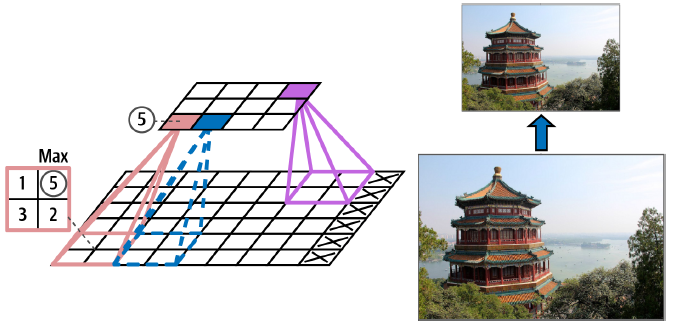 <br>


* A max pooling layer introduces some level of invariance to small translations. Moreover, max pooling offers a small amount of rotational invariance and a slight scale invariance. Such invariance (even if it is limited) can be useful in cases where the prediction should not depend on these details, such as in classification tasks.
    <br> &emsp; 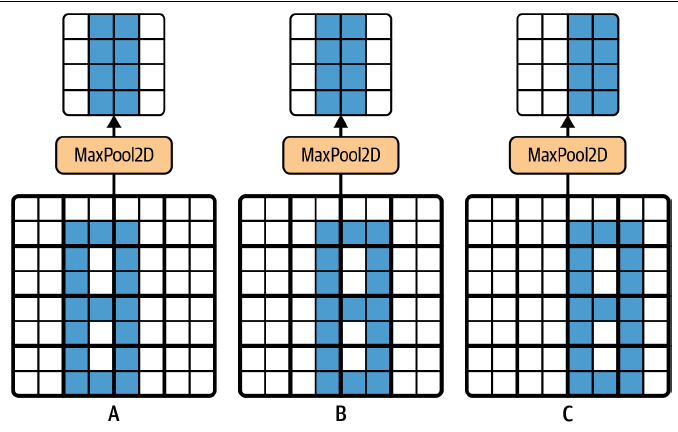 <br>
    * However, max pooling has some downsides too. It's very destructive: even with a tiny 2 × 2 kernel and a stride of 2, the output will be two times smaller in both directions (so its area will be four times smaller), simply dropping 75% of the input values. And in some applications, invariance is not desirable.




# C. Implementing Pooling Layers w/ Keras

* `MaxPoool2D`
    * Max pooling preserves only the strongest features, getting rid of all the meaningless ones, so the next layers get a cleaner signal to work with. Moreover, max pooling offers stronger translation invariance than average pooling, and it requires slightly less compute.

* To create an average pooling layer, use `AvgPool2D`. Works like a max pooling layer, except it computes the mean rather than the max.

* Depth-wise Pooling
    * Max pooling and average pooling can be performed along the depth dimension instead of the spatial dimensions, although it’s not as common.
    * This can allow the CNN to learn to be invariant to various features. For example, it could learn multiple filters, each detecting a different rotation of the same pattern (such as handwritten digits) <br>:
    &emsp; 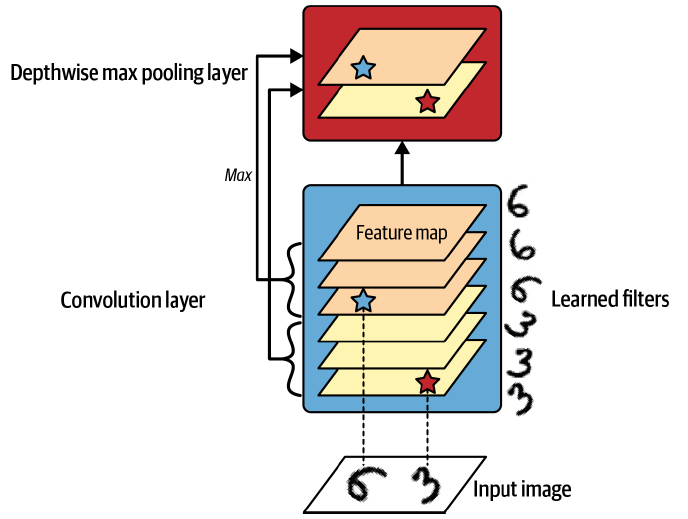 <br>
    * Depthwise max pooling layer would ensure that the output is the same regardless of the rotation.
    * The CNN could similarly learn to be invariant or anything: thickness, brightness, skew, color and so on.
    * Keras does not include a depthwise max pooling layer, but it can be implemented in a custom layer.

* Global Average Pooling Layer:
    * All it does is compute the mean of each entire feature map (it’s like an average pooling layer using a pooling kernel with the same spatial dimensions as the inputs).
    * It ouputs a single number per feature map and per instance. Although this is of course extremely destructive (most of the information in the feature map is lost), it can be useful just before the output layer.
    * `GlobalAvgPool2D`

In [36]:
max_pool = tf.keras.layers.MaxPool2D(pool_size=2)

In [37]:
output = max_pool(images)

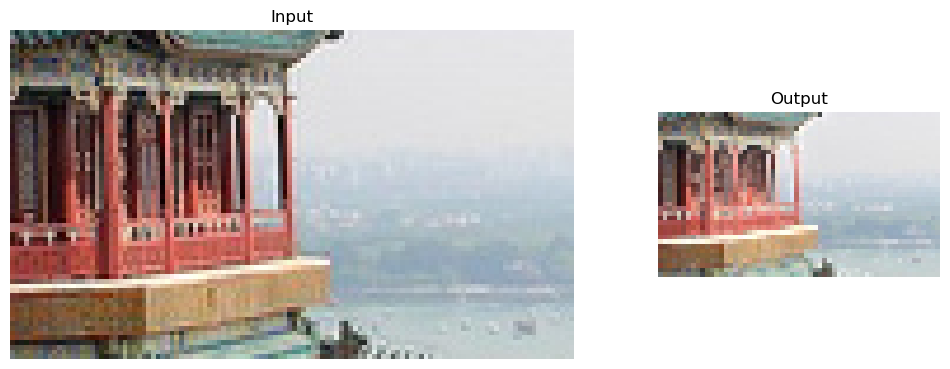

In [38]:
import matplotlib as mpl

fig = plt.figure(figsize=(12, 8))
gs = mpl.gridspec.GridSpec(nrows=1, ncols=2, width_ratios=[2, 1])

ax1 = fig.add_subplot(gs[0, 0])
ax1.set_title("Input")
ax1.imshow(images[0])  # plot the 1st image
ax1.axis("off")
ax2 = fig.add_subplot(gs[0, 1])
ax2.set_title("Output")
ax2.imshow(output[0])  # plot the output for the 1st image
ax2.axis("off")
plt.show()

In [39]:
# Custom depthwise pooling layer

class DepthPool(tf.keras.layers.Layer):
    def __init__(self, pool_size=2, **kwargs):
        super().__init__(**kwargs)
        self.pool_size = pool_size
    
    def call(self, inputs):
        shape = tf.shape(inputs)  # shape[-1] is the number of channels
        groups = shape[-1] // self.pool_size  # number of channel groups
        new_shape = tf.concat([shape[:-1], [groups, self.pool_size]], axis=0)
        return tf.reduce_max(tf.reshape(inputs, new_shape), axis=-1)

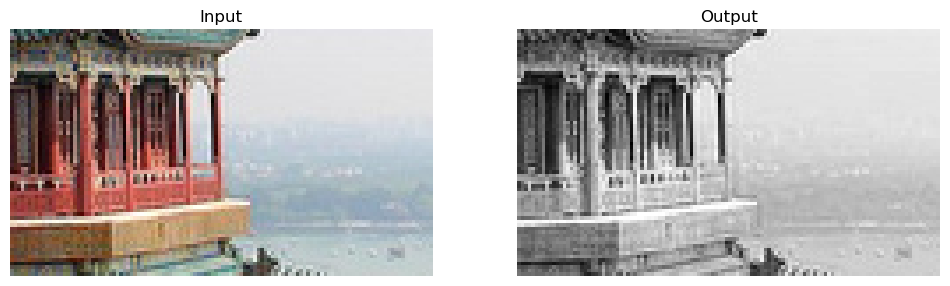

In [40]:
depth_output = DepthPool(pool_size=3)(images)

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.title("Input")
plt.imshow(images[0])  # plot the 1st image
plt.axis("off")
plt.subplot(1, 2, 2)
plt.title("Output")
plt.imshow(depth_output[0, ..., 0], cmap="gray")  # plot 1st image's output
plt.axis("off")
plt.show()

In [41]:
# Global average pooling layer

global_avg_pool = tf.keras.layers.GlobalAvgPool2D()

In [42]:
# using the lambda layer
global_avg_pool = tf.keras.layers.Lambda(
    lambda X: tf.reduce_mean(X, axis=[1, 2]))

In [43]:
# if applied to the input layer, this will get the mean intensity of red, green and blue of each image
global_avg_pool(images)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[0.64338624, 0.5971759 , 0.5824972 ],
       [0.76306933, 0.26011038, 0.10849128]], dtype=float32)>

# D. CNN Architectures:

* Typical CNN architectures stack a few convolutional layers  (each one generally followed by a ReLU layer) then a pooling layer, then another few convolutional layers (+ReLU), then another pooling layer, and so on. The image gets smaller and smaller as it progresses through the network, but it also typically gets deeper and deeper (i.e., with more feature maps), thanks to the convolutional layers. At the top of the stack, a regular feedforward neural network is added, composed of a few fully connected layers (+ReLUs), and the final layer outputs the prediction (e.g., a softmax layer that outputs estimated class probabilities). <br>
    &emsp; 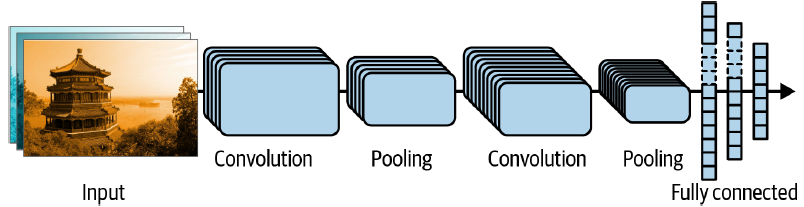 <br>
    

```
mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = mnist
X_train_full = np.expand_dims(X_train_full, axis=-1).astype(np.float32) / 255
X_test = np.expand_dims(X_test.astype(np.float32), axis=-1) / 255
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]


```
from functools import partial

tf.random.set_seed(42)  
DefaultConv2D = partial(tf.keras.layers.Conv2D, kernel_size=3, padding="same",
                        activation="relu", kernel_initializer="he_normal")
model = tf.keras.Sequential([
    DefaultConv2D(filters=64, kernel_size=7, input_shape=[28, 28, 1]),
    tf.keras.layers.MaxPool2D(),
    DefaultConv2D(filters=128),
    DefaultConv2D(filters=128),
    tf.keras.layers.MaxPool2D(),
    DefaultConv2D(filters=256),
    DefaultConv2D(filters=256),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=64, activation="relu",
                          kernel_initializer="he_normal"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units=10, activation="softmax")
])
```

```
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam",
              metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))
score = model.evaluate(X_test, y_test)
X_new = X_test[:10]  
y_pred = model.predict(X_new)
```

### C.1. LeNet-5

* LeNet-5 Architectue: <br>
    &emsp; 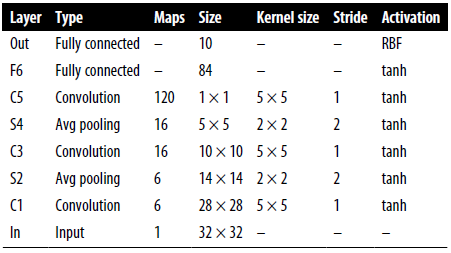 <br>


### C.2. AlexNet:

* AlexNet Architecture: <br>
    &emsp; 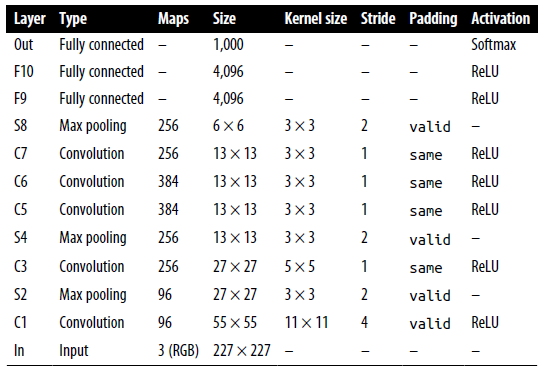 <br>

* AlexNet also uses a competitive normalization step immediately after the ReLU step of layers C1 and C3, called local response normalization (LRN):
    * The most strongly activated neurons inhibit other neurons located at the same position in neighboring feature maps.
    * This encourages different feature maps to specialize, pushing them apart and forcingthem to explore a wider range of features, ultimately improving generalization.
    * This can be implemented using the `tf.nn.local_response_normalization()` function w/c can be wrapped in a `Lambda` layer if used in a Keras model.

### C.3. GoogLeNet:

* Inception Modules allow GoogLeNet to use parameters much more efficiently than previous architectures: GoogLeNet has 10 times fewer parameters than AlexNet. <br>
    * Inception Module: <br>
    &emsp; 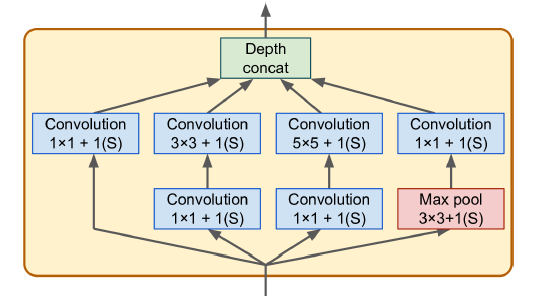 <br>

* Inception Modulues have convolutational layers 1x1 kernels for 3 purposes:
    * Capture patterns along the depth dimension (i.e., across channels).
    * They are configured to output fewer feature maps than their inputs, so they serve as bottleneck layers, to reduce dimensionality. This cuts the computational cost and the number of parameters, speeding up training and improving generalization.
    * Each pair of convolutional layers ([1 × 1, 3 × 3] and [1 × 1, 5 × 5]) acts like a single powerful convolutional layer, capable of capturing more complex patterns. A convolutional layer is equivalent to sweeping a dense layer across the image (at each location, it only looks at a small receptive field), and these pairs of convolutional layers are equivalent to sweeping two-layer neural networks across the image.

* GoogLeNet Architecture: <br>
    &emsp; 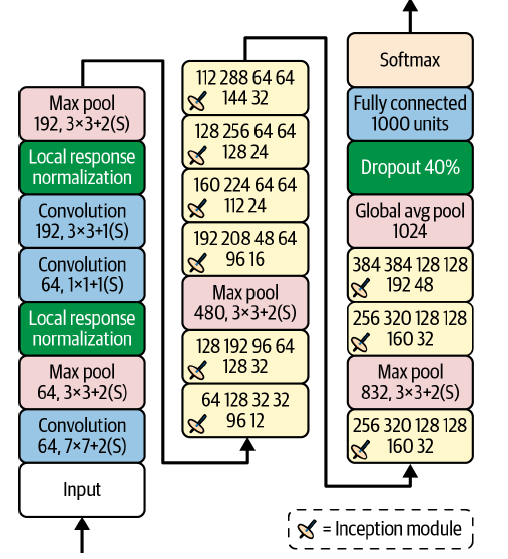 <br>
    * The six numbers in the inception modules represent the number of feature maps output by each convolutional layer in the module.
    * Several variants of the GoogLeNet architecture were later proposed by Google researchers, including Inception-v3 and Inception-v4, using slightly different inception modules to reach even better performance.


### C.4. VGGNet:

* From Visual Geometry Group research lab  at Oxford University.
* It had 2 or 3 convolutional layers and a pooling layer, then again 2 or 3 convolutional layers and a pooling layer and so on (reaching a total of 16 or 19 convolutional layers, depending on the VGG variant), plus a final dense network w/ 2 hidden layers and the output layer. It uses small 3x3 filters, but it had many of them.


### C.5. ResNet (Residual Network):

* It confirmed the general trend: computer vision models were getting deeper and deeper, with fewer and fewer parameters. The key to being able to train such a deep network is to use skip connections (also called shortcut connections):
    * The signal feeding into a layer is also added to the output of a layer located higher up the stack.

* Residual Learning: <br>
    &emsp; 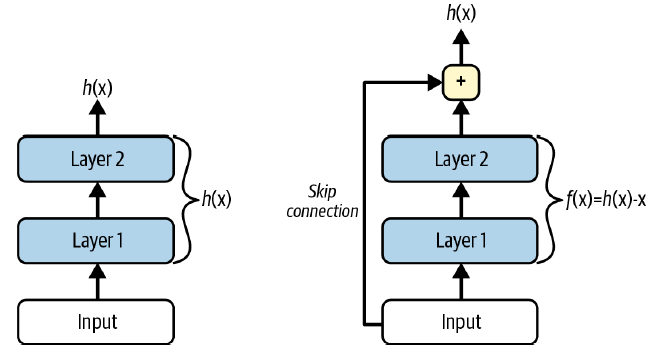 <br>
    * When training a neural network, the goal is to make it model a target function $h(x)$.
    * If you add the input $x$ to the output of the network (i.e., you add a skip connection), then the network will be forced to model $f(x) = h(x) – x$ rather than $h(x)$. This is called *residual learning*.
    * When you initialize a regular neural network, its weights are close to zero, so the network just outputs values close to zero. If you add a skip connection, the resulting network just outputs a copy of its inputs; in other words, it initially models the identity function. If the target function is fairly close to the identity function (which is often the case), this will speed up training considerably.
    * If you add many skip connections, the network can start making progress even if several layers have not started learning yet: <br>
        &emsp; 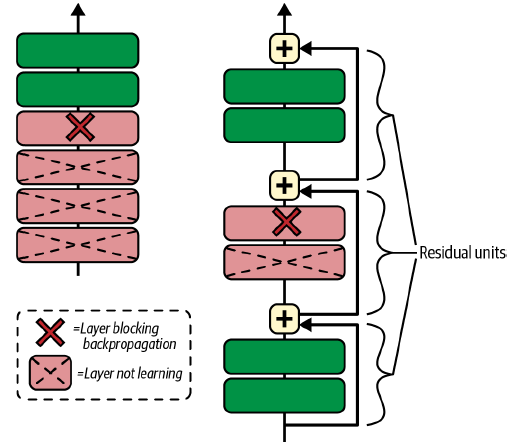 <br>
        * The skip connections make the signal to easily make its way across the whole network.
        * The deep residual network can be seen as a stack of residual units (RUs), where each residual unit is a small neural network with a skip connection.

* ResNet Architecture:
    * Each residual unit is composed of two convolutional layers (and no pooling layer), with batch normalization (BN) and ReLU activation, using 3 × 3 kernels and preserving spatial dimensions (stride 1, "same" padding). <br>
    &emsp; 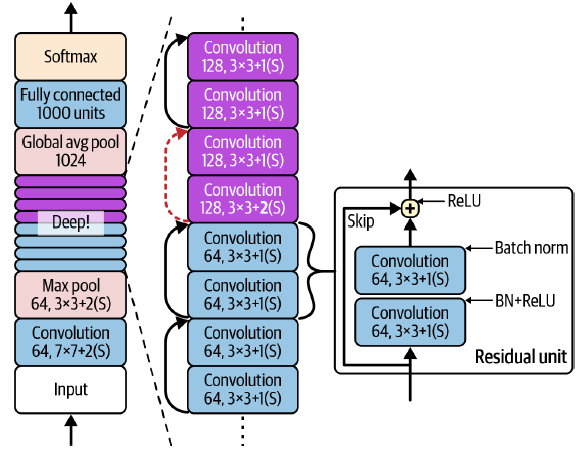 <br>
    * The number of feature maps is doubled every few residual units, at the same time as their height and width are halved (using convolutional layer w/ stride 2.).
    * When this happens, the inputs cannot be added directly to the outputs of the residual unit because they don’t have the same shape.To solve this problem, the inputs are passed through a 1 × 1 convolutional layer with stride 2 and the right number of output feature maps. <br>
    &emsp; 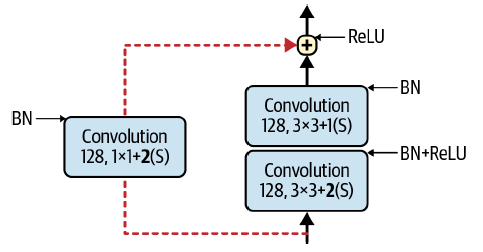 <br>

* Different variations of the architecture exist, with different numbers of layers. ResNet-34 is a ResNet with 34 layers (only counting the convolutional layers and the fully connected layer) containing 3 RUs that output 64 feature maps, 4 RUs with 128 maps, 6 RUs with 256 maps, and 3 RUs with 512 maps.


### C.6. Xception:

* Variant of the GoogLeNet Architecture, w/c stands for Extreme Inception.
* Just like Inception-v4, it merges the ideas of GoogLeNet and ResNet, but it replaces the inception modules w/ a special type of layer called a *depthwise separable convolution layer* .

* **Depthwise separable convolution layer**:
    * While a regular convolutional layer uses filters that try to simultaneously capture spatial patterns (e.g., an oval) and cross-channel patterns (e.g., mouth + nose + eyes = face), a separable convolutional layer makes the strong assumption that spatial patterns and cross-channel patterns can be modeled separately.
    * It is composed of 2 parts:
        * First part applies a single spatial filter to each input feature map.
        * Second part looks exclusively for cross-channel patterns - It is a regular convolutional layer w/ 1x1 filters.
    * Since separable convolutional layers only have one spatial filter per input channel, you should avoid using them after layers that have too few channels, such as the input layer. For this reason, the Xception architecture starts with 2 regular convolutional layers, but then the rest of the architecture uses only separable convolutions (34 in all), plus a few max pooling layers and the usual final layers (a global average pooling layer and a dense output layer). <br>
    &emsp; 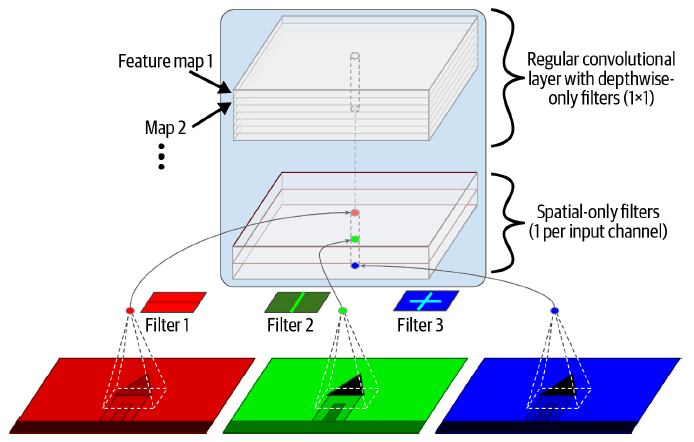 <br>
    * Separable convolutional layers use fewer parameters, less memory, and fewer computations than regular convolutional layers, and they often perform better. Consider using them by default, except after layers with few channels (such as the input channel).
    * `SeparableConv2D` in Keras. Keras also offers a `DepthwiseConv2D` layer that implements the 1st part of a depthwise separable convolutional layer (i.e., applying one spatial filter per input feature map).


### C.7. SENet (Squeeze-and-Excitation Network):

* This architecture extends existing architectures such as inception networks and ResNets, and boosts their performance.
* The extended versions of inception networks and ResNets are called *SE-Inception* and *SE-ResNet*, respectively. The boost comes from the fact that a SENet adds a small neutral network, called an SE block, to every inception module or residual unit in the original architecture: <br>
        &emsp; 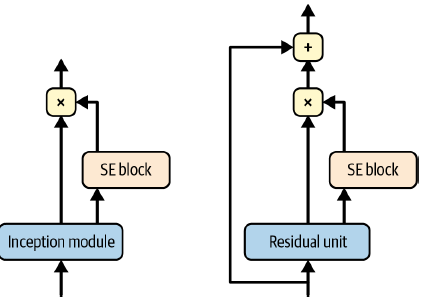 <br>

* SE Block:
    * Analyzes the output of the unit it is attached to, focusing exclusively on the depth dimension (it does not look for any spatial pattern), and it learns w/c features are usually most active together. It then uses this information to recalibrate the feature maps. <br>
        &emsp; 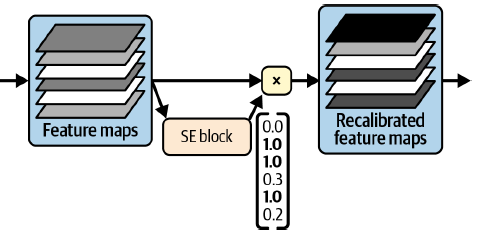 <br>
    * For example, an SE block may learn that mouths, noses, and eyes usually appear together in pictures: if you see a mouth and a nose, you should expect to see eyes as well. So, if the block sees a strong activation in the mouth and nose feature maps, but only mild activation in the eye feature map, it will boost the eye feature map (more accurately, it will reduce irrelevant feature maps). If the eyes were somewhat confused with something else, this feature map recalibration will help resolve the ambiguity.
* An SE block is composed of just 3 layers:
    * A Global Average Pooling Layer: 
        * This layer computes the mean activation for each feature map: for example, if its input contains 256 feature maps, it will output 256 numbers representing the overall level of response for each filter.
    * Hidden Dense Layer using the ReLU activation function:
        * This is where the "squezee"  happens: This layer has significantly fewer than 256 neurons - typically 16 times fewere than the number of the feature maps - so the 256 numbers get compressed into a small vector.
        * This is a low-dimensional vector representation (i.e., an embedding) of the distribution of feature responses. This bottleneck step forces the SE block to learn a general representation of the feature combinations
    * A dense output layer using the sigmoid activation function:
        * Finally, the output layer takes the embedding and outputs a recalibration vector containing one number per feature map (e.g., 256), each between 0 and 1. The feature maps are then multiplied by this recalibration vector, so irrelevant features (with a low recalibration score) get scaled down while relevant features (with a recalibration score close to 1) are left alone.
    <br>
    &emsp; 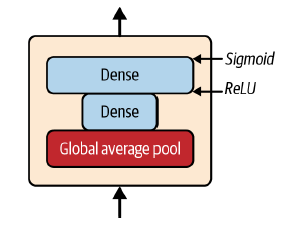 <br>    

### C.8. Other Noteworthy Architectures:

* **RexNeXt (Aggregated Residual Transformations for Deep Neural Networks)**:
    * The ResNeXt residual units are composed of many parallel stacks (e.g., 32 stacks), with 3 convolutional layers each.
    * The first 2 layers in each stack only use a few filters , so the overall number of parameters remains the same as in ResNet.Then the outputs of all the stacks are added together, and the result is passed to the next residual unit (along with the skip connection).

* **DenseNet (Densely Connected Convolutional Networks)**:
    * A DenseNet is composed of several dense blocks, each made up of a few densely connected convolutional layers.
    * What does "densely connected" mean?
        * The output of each layer is fed as input to every layer after it within the same block.
        * For example, layer 4 in a block takes as input the depthwise concatenation of the outputs of layers 1, 2, and 3 in that block. Dense blocks are separated by a few transition layers.

* **MobileNet**:
    * MobileNets are streamlined models designed to be lightweight and fast, making them popular in mobile and web applications. They are based on depthwise separable convolutional layers, like Xception.

* **CSPNet**:
    * A Cross Stage Partial Network (CSPNet) is similar to a DenseNet, but part of each dense block’s input is concatenated directly to that block’s output, without going through the block.

* **EfficientNet**:
    * The authors proposed a method to scale any CNN efficiently, by jointly increasing the depth (number of layers), width (number of filters per layer), and resolution (size of the input image) in a principled way. This is called **compound scaling**.
    * The authors used neural architecture search to find a good architecture for a scaled-down version of ImageNet (w/ smaller and fewer images), and then used compound scaling to create larger and larger versions of this architecture.

##### Compound Scaling:

* It is based on a logarithmic measure of the compute budget , $\phi$ : If your compute budget doubles, then $\phi$ increases by 1. The number of floating-point operation available for training is proportional to $2^{\phi}$. The CNN architecture's depth, width and resolution should scale as $\alpha^{\phi}, \beta^{\phi}, \gamma^{\phi}$, respectively. The factors $\alpha, \beta$, and $\gamma$ must be greater than 1, and $\alpha\ +\ \beta^2\ +\ \gamma^2$ should be close to 2. The optimal values for these factors depend on the CNN’s architecture.

* To find the optimal values for the EfficientNet architecture, the authors started with a small baseline model (EfficientNetB0), fixed $\alpha=1$, and simply ran a grid search: they found $\alpha=1.2, \beta=1.1, and \gamma=1.1$. They then used these factors to create several larger architectures, named EfficientNetB1 to EfficientNetB7, for increasing values of $\phi$.

### C.9. Choosing the Right CNN Architecture:

* Depends on what matters most to you: Accuracy, model size, inference speed on cpu (or gpu).
* Pretrained models available in Keras (from `tf.keras.applications` package):
     <br>
    &emsp; 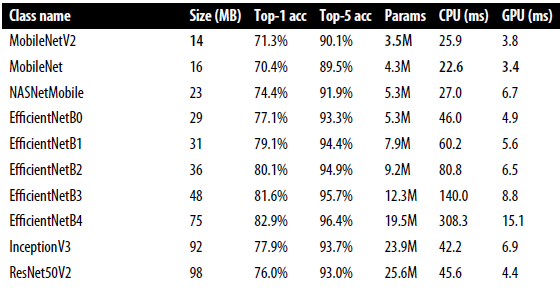 <br>
    &emsp; 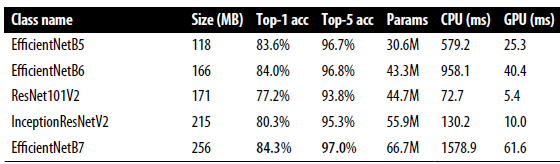 <br>

# E. Implementing a `ResNet-34` CNN Using Keras:



In [48]:
# Implementing ResNet-34 from scratch w/ Keras:

from functools import partial

DefaultConv2D = partial(tf.keras.layers.Conv2D, kernel_size=3, strides=1,
                        padding="same", kernel_initializer="he_normal",
                        use_bias=False)

class ResidualUnit(tf.keras.layers.Layer):
    def __init__(self, filters, strides=1, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.activation = tf.keras.activations.get(activation)
        self.main_layers = [
            DefaultConv2D(filters, strides=strides),
            tf.keras.layers.BatchNormalization(),
            self.activation,
            DefaultConv2D(filters),
            tf.keras.layers.BatchNormalization()
        ]
        self.skip_layers = []
        if strides > 1:
            self.skip_layers = [
                DefaultConv2D(filters, kernel_size=1, strides=strides),
                tf.keras.layers.BatchNormalization()
            ]

    def call(self, inputs):
        Z = inputs
        for layer in self.main_layers:
            Z = layer(Z)
        skip_Z = inputs
        for layer in self.skip_layers:
            skip_Z = layer(skip_Z)
        return self.activation(Z + skip_Z)

In [49]:
model = tf.keras.Sequential([
    DefaultConv2D(64, kernel_size=7, strides=2, input_shape=[224, 224, 3]),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation("relu"),
    tf.keras.layers.MaxPool2D(pool_size=3, strides=2, padding="same"),
])
prev_filters = 64
for filters in [64] * 3 + [128] * 4 + [256] * 6 + [512] * 3:
    strides = 1 if filters == prev_filters else 2
    model.add(ResidualUnit(filters, strides=strides))
    prev_filters = filters

model.add(tf.keras.layers.GlobalAvgPool2D())
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(10, activation="softmax"))

# F. Using Pretrained Models from Keras

* Pretrained networks are readily available  in the `tf.keras.applications` package.
* The pretrained models assume that the images are preprocessed in a specific way.
    * In some cases they may expect the inputs to be scaled from 0 to 1, or from -1 to 1..
    * Each model provides a `preprocess_input()` function that you can use to preprocess your images. These functions assume that the original pixel values range from 0 to 255.
    * The `decode_predictions()` function display the top K predictions, including the class name and the estimated probability of each predicted class.
        * For each image, it returns an array containing the top K predictions, where each prediction is represented as an array containing the class identifier, its name, and corresponding confidence score.

In [50]:
# Loading the ResNet-50 model, pretrained on ImageNet
model = tf.keras.applications.ResNet50(weights="imagenet")

102967424/102967424 [==============================] - 22s 0us/step


In [52]:
# ResNet-50 model expects a 224x224 pixel images. Use Resizing layer to resize sample images
images = load_sample_images()['images']
images_resized = tf.keras.layers.Resizing(
    height=224, width=224,
    crop_to_aspect_ratio=True
)(images)

inputs = tf.keras.applications.resnet50.preprocess_input(images_resized)

In [53]:
Y_proba = model.predict(inputs)
Y_proba.shape

1/1 [==============================] - 2s 2s/step


(2, 1000)

In [54]:
top_K = tf.keras.applications.resnet50.decode_predictions(Y_proba, top=3)
for image_index in range(len(images)):
    print(f"Image #{image_index}")
    for class_id, name, y_proba in top_K[image_index]:
        print(f"  {class_id} - {name:12s} {y_proba:.2%}")

35363/35363 [==============================] - 0s 0us/step
Image #0
  n03877845 - palace       54.69%
  n03781244 - monastery    24.72%
  n02825657 - bell_cote    18.55%
Image #1
  n04522168 - vase         32.66%
  n11939491 - daisy        17.81%
  n03530642 - honeycomb    12.06%
